In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dd4025c279df4f16b91f6cf10cf5b3ed = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7ITxTArvRSJA1HqOVXEDHT9R-zCP2kVgVYLKpJNViGUP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_dd4025c279df4f16b91f6cf10cf5b3ed.get_object(Bucket='datascience-donotdelete-pr-9i2b3zs0qw19l3',Key='RTC Location 2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head() 


,Date,Police_ref,Easting,Northing,Severity,Road_cond,Visibility,Casualties,Pedestrian,Cycles,...,Cross_ctrl,Cross_fac,Weather,SpCond,Carr_haz,Day,Location,Local_Auth,ReportedAt,Parish
0,20180101,18263388,519784,299454,2. Serious,2. Wet/Damp,4. Darkness: street lights present and lit,1,0,0,...,0. None,1. Zebra crossing,1. Fine without high winds,0,0. None,2. Monday,EASTFIELD ROAD AT JN WITH PADHOLME ROAD,E06000031,1. Yes,181
1,20180102,18257386,519682,270658,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,2,0,0,...,0. None,0. None within 50m,1. Fine without high winds,0,0. None,3. Tuesday,NEAR BRAMPTON HUT SERVICES SOUTBOUND A1 NEAR J...,E07000011,1. Yes,26
2,20180103,18259484,540715,242553,3. Slight,1. Dry,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,BARLEY ROAD B1368,E07000012,1. Yes,95
3,20180103,18257077,546231,257858,3. Slight,1. Dry,4. Darkness: street lights present and lit,1,0,0,...,0. None,5. Ped. phase at traffic signal junction,1. Fine without high winds,0,0. None,4. Wednesday,MILL ROAD AT JN WITH GWYDIR STREET,E07000008,1. Yes,0
4,20180103,18255977,530858,288082,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,FORTY FOOT BANK B1096,E07000011,2. No - accident was reported 'over the counter',184


In [2]:
import numpy as np
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 


In [3]:
df = df_data_1[['Police_ref', 'Casualties', 'Vehicles', 'Roadnum1','Speed_Lim']] 

In [4]:
df.head(4) 

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim
0,18263388,1,2,0,30
1,18257386,2,2,1,40
2,18259484,1,1,1368,30
3,18257077,1,2,0,20


In [5]:
# Add new columns named 'Sev', 'Road', 'Vis' and 'Weat'
# Set values to each category, to be used for calculation using train and test models
# Create the dictionary 
sev_dict ={'1. Fatal' : 1, '2. Serious' : 2, '3. Slight' : 3}    
df['Sev'] = df_data_1['Severity'].apply(set_value, args =(sev_dict, ))  

road_dict ={'1. Dry' : 20, '2. Wet/Damp' : 40, '3. Snow' : 60, '4. Frost/Ice' : 80}     
df['Road'] = df_data_1['Road_cond'].apply(set_value, args =(road_dict, ))  

vis_dict ={'1. Daylight' : 10, '4. Darkness: street lights present and lit' : 40, '5. Darkness: street lights present but unlit' : 50,
           '6. Darkness: no street lighting' : 60, '7. Darkness: street lighting unknown' : 70}
df['Vis'] = df_data_1['Visibility'].apply(set_value, args =(vis_dict, ))  

weat_dict ={'1. Fine without high winds' : 10, '2. Raining without high winds' : 20, '3. Snowing without high winds' : 30,
           '4. Fine with high winds' : 40, '5. Raining with high winds' : 50, '6. Snowing with high winds' : 60, 
          '7. Fog or mist' : 0, '8. Other' : 75, '9. Unknown' : 80
           } 
df['Weat'] = df_data_1['Weather'].apply(set_value, args =(weat_dict, ))  

sum_col = df_data_1['Pedestrian'] + df_data_1['Cycles'] + df_data_1['P2W'] + df_data_1['OAPs'] + df_data_1['Children'] 

df['Incidental'] = sum_col 


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [6]:
df.head() 

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road,Vis,Weat,Incidental
0,18263388,1,2,0,30,2,40,40,10,0
1,18257386,2,2,1,40,3,40,60,10,0
2,18259484,1,1,1368,30,3,20,60,40,0
3,18257077,1,2,0,20,3,20,40,10,0
4,18255977,1,2,1096,50,3,40,60,40,0


In [7]:
df.isnull().sum() 

Police_ref    0
Casualties    0
Vehicles      0
Roadnum1      0
Speed_Lim     0
Sev           0
Road          0
Vis           0
Weat          0
Incidental    0
dtype: int64

In [8]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 


from sklearn.linear_model import LogisticRegression 

X = np.asarray(df[['Road', 'Vis', 'Weat', 'Speed_Lim']]) 

y = df[['Casualties']] 
y[0:5] 

,Casualties
0,1
1,2
2,1
3,1
4,1


In [9]:
X[0:5] 

array([[40, 40, 10, 30],
       [40, 60, 10, 40],
       [20, 60, 40, 30],
       [20, 40, 10, 20],
       [40, 60, 40, 50]])

In [10]:
from sklearn import preprocessing 

X = preprocessing.StandardScaler().fit(X).transform(X) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

print('Train set:', X_train.shape, y_train.shape) 

print('Test set:', X_test.shape, y_test.shape) 

Train set: (901, 4) (901, 1)
Test set: (901, 4) (901, 1)


In [12]:
from sklearn.metrics import confusion_matrix 
LR = LogisticRegression(solver='liblinear').fit(X_train, y_train) 
yhat = LR.predict(X_test) 
yhat_prob = LR.predict_proba(X_test) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
from sklearn.metrics import f1_score 
from sklearn.metrics import jaccard_similarity_score 
f1_score(y_test, yhat, average='weighted') 


0.6164684809622833

In [17]:
jaccard_similarity_score(y_test, yhat) 

0.730299667036626

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train,  y_train)
print ('Test set:', X_test,  y_test) 

Train set: [[ 1.27756184  1.0778083  -0.32752655 -0.81710103]
 [ 1.27756184  2.18008443 -0.32752655  1.01882921]
 [ 1.27756184 -0.57560591 -0.32752655  1.01882921]
 ...
 [-0.53231743  2.18008443 -0.32752655  1.63080595]
 [-0.53231743 -0.57560591 -0.32752655 -0.20512428]
 [-0.53231743  2.7312225  -0.32752655  1.63080595]]       Casualties
1628           1
17             3
25             1
873            1
370            1
722            1
1222           1
1060           1
379            1
1784           2
642            3
1357           1
1491           1
1532           4
347            1
1792           1
1739           1
1189           1
1509           2
1383           1
465            1
1449           1
459            2
1467           2
736            1
601            1
1730           1
131            2
1221           1
1100           1
...          ...
1533           1
422            1
1737           2
149            1
533            2
183            1
1024           2
1411          

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)  

yhat = clf.predict(X_test)
yhat [0:5] 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')  

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6241863310983217

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat) 

0.7314095449500555

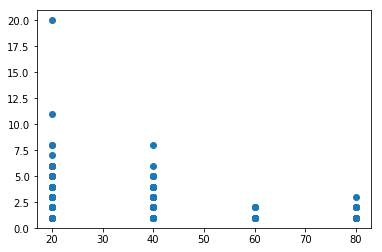

In [22]:
# Import seaborn
import seaborn as sns 
X = np.asarray(df[['Road']])
y = df[['Casualties']]  
plt.scatter(X, y) 

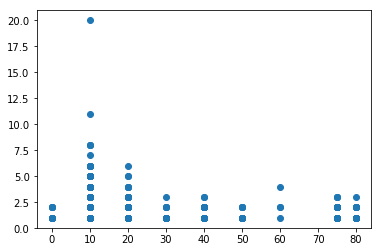

In [24]:
X = np.asarray(df[['Weat']])
y = df[['Casualties']]  
plt.scatter(X, y) 

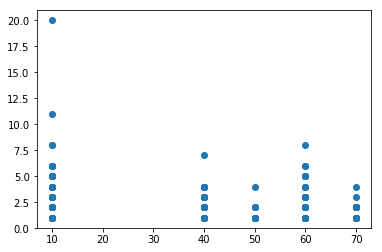

In [25]:
X = np.asarray(df[['Vis']])
y = df[['Casualties']]  
plt.scatter(X, y) 

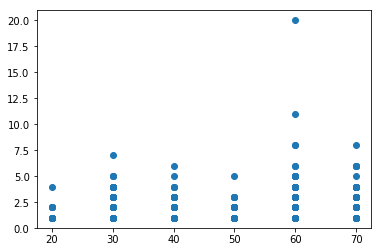

In [26]:
X = np.asarray(df[['Speed_Lim']])
y = df[['Casualties']]  
plt.scatter(X, y) 